In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time

In [2]:
url="https://www.cars24.com/buy-used-cars-mumbai/?itm_source=Cars24Website&itm_medium=sticky_header"

In [3]:
page=requests.get(url)

In [4]:
page.status_code

200

In [5]:
soup=BeautifulSoup(page.text)

In [6]:
soup

<!DOCTYPE html>
<html lang="en">
<head>
<link href="//www.googleoptimize.com" rel="preconnect"/>
<link href="//www.googletagmanager.com" rel="preconnect"/>
<link href="//www.google-analytics.com" rel="preconnect"/>
<link href="//connect.facebook.net" rel="preconnect"/>
<link href="//cdn.jsdelivr.net" rel="preconnect"/>
<link href="//widgets.getsitecontrol.com" rel="preconnect"/>
<link href="//s.yimg.com" rel="preconnect"/>
<link href="//www.googleadservices.com" rel="preconnect"/>
<link href="//d2r1yp2w7bby2u.cloudfront.net" rel="preconnect"/><meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="697234207046254" property="fb:app_id"/><!--scripts from helmet--><link data-react-helmet="true" href="https://www.cars24.com/buy-used-cars-mumbai/" rel="canonical"/><link data-react-helmet="true" href="https://www.cars24.com/buy-used-cars-mumbai/amp/" rel="amphtml"/><script data-react-helmet="true" type

In [7]:
soup.text

'\n\n\n\n\n\n\n\n\n\n\n\nUsed Cars in Mumbai - Second Hand Cars in Mumbai for Sale\nMumbai  Popular CitiesUsed cars in BengaluruPopular CarsUsed Hyundai carsUsed Renault carsUsed Mahindra carsUsed Toyota carsUsed Audi carsUsed Honda carsUsed Maruti carsUsed Tata carsUsed Ford carsUsed Skoda carsAll used cars in BengaluruUsed cars in ChennaiPopular CarsUsed Hyundai carsUsed Renault carsUsed Mahindra carsUsed Toyota carsUsed Audi carsUsed Honda carsUsed Maruti carsUsed Tata carsUsed Ford carsUsed Skoda carsAll used cars in ChennaiUsed cars in New DelhiPopular CarsUsed Hyundai carsUsed Renault carsUsed Mahindra carsUsed Toyota carsUsed Audi carsUsed Honda carsUsed Maruti carsUsed Tata carsUsed Ford carsUsed Skoda carsAll used cars in New DelhiUsed cars in MumbaiPopular CarsUsed Hyundai carsUsed Renault carsUsed Mahindra carsUsed Toyota carsUsed Audi carsUsed Honda carsUsed Maruti carsUsed Tata carsUsed Ford carsUsed Skoda carsAll used cars in MumbaiUsed cars in PunePopular CarsUsed Hyunda

In [8]:
carName = []
price = []
kms = []
emi = []
pagenum = []

for i in range(1,36):
    start_time = time.time()
    URL = 'https://www.cars24.com/buy-used-car/?sort=P&page={}&storeCityId=2378'.format(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    for x in soup.find_all('div', attrs={'class':'col-4'}):
        cName = x.find('h2',class_="_3FpCg")
        cost = x.find('div',class_="_7udZZ")
        carkms = x.find('ul',class_="bVR0c")
        caremi = x.find('div',class_="_2HFRN")
        oprice =x.find('p',class_="_31Wtw")
        
        if cName is None:
            carName.append(np.NaN)
        else:
            carName.append(cName.text)
        
        if cost is None:
            price.append(np.NaN)
        else:
            price.append(cost.text)
            
        if carkms is None:
            kms.append(np.NaN)
        else:
            kms.append(carkms.text)
        
        if caremi is None:
            emi.append(np.NaN)
        else:
            emi.append(caremi.text)
            
        pagenum.append(i)
    print('Page {} completed in {} secs'.format(i, time.time() - start_time))

Page 1 completed in 1.4706192016601562 secs
Page 2 completed in 1.4346950054168701 secs
Page 3 completed in 1.3292481899261475 secs
Page 4 completed in 1.38027024269104 secs
Page 5 completed in 1.28397798538208 secs
Page 6 completed in 1.447742223739624 secs
Page 7 completed in 1.4255609512329102 secs
Page 8 completed in 1.2203102111816406 secs
Page 9 completed in 1.3180878162384033 secs
Page 10 completed in 1.8192522525787354 secs
Page 11 completed in 1.3139030933380127 secs
Page 12 completed in 1.372497797012329 secs
Page 13 completed in 1.2373292446136475 secs
Page 14 completed in 1.1695120334625244 secs
Page 15 completed in 1.2642667293548584 secs
Page 16 completed in 1.2821252346038818 secs
Page 17 completed in 0.7544941902160645 secs
Page 18 completed in 1.2740695476531982 secs
Page 19 completed in 0.8070695400238037 secs
Page 20 completed in 1.187462329864502 secs
Page 21 completed in 1.315187931060791 secs
Page 22 completed in 1.7509732246398926 secs
Page 23 completed in 1.4787

In [9]:
len(carName)

694

In [10]:
car_df = pd.DataFrame({'CARNAME':carName,'PRICE':price,'KMS':kms,'EMI':emi})

In [11]:
car_df.head(10)

,CARNAME,PRICE,KMS,EMI
0,2012 Honda Brio,"₹350,999","24,171 km2nd OwnerPetrol","₹7,808/month"
1,2014 Honda Amaze,"₹457,799","62,672 km1st OwnerDiesel","₹10,183/month"
2,2017 Hyundai Elite i20,"₹561,699","11,371 km1st OwnerPetrol","₹12,495/month"
3,2016 Hyundai Grand i10,"₹494,799","15,650 km1st OwnerPetrol","₹11,007/month"
4,2016 Hyundai Elite i20,"₹517,499","65,640 km1st OwnerPetrol","₹11,511/month"
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,2018 Maruti Dzire,"₹647,499","27,960 km1st OwnerPetrol","₹14,403/month"
8,2017 Hyundai Xcent,"₹554,099","31,063 km1st OwnerPetrol","₹12,326/month"
9,2018 Honda Amaze,"₹718,999","40,267 km1st OwnerPetrol","₹15,994/month"


## Saving the file as csv file

In [12]:
car_df.to_csv('finalcar_data.csv')

## Importing the csv file for the modification 

In [13]:
df = pd.read_csv('finalcar_data.csv')

In [14]:
df.shape

(694, 5)

In [15]:
df.isnull().sum()

Unnamed: 0     0
CARNAME       64
PRICE         64
KMS           64
EMI           64
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.head(10)

,Unnamed: 0,CARNAME,PRICE,KMS,EMI
0,0,2012 Honda Brio,"₹350,999","24,171 km2nd OwnerPetrol","₹7,808/month"
1,1,2014 Honda Amaze,"₹457,799","62,672 km1st OwnerDiesel","₹10,183/month"
2,2,2017 Hyundai Elite i20,"₹561,699","11,371 km1st OwnerPetrol","₹12,495/month"
3,3,2016 Hyundai Grand i10,"₹494,799","15,650 km1st OwnerPetrol","₹11,007/month"
4,4,2016 Hyundai Elite i20,"₹517,499","65,640 km1st OwnerPetrol","₹11,511/month"
7,7,2018 Maruti Dzire,"₹647,499","27,960 km1st OwnerPetrol","₹14,403/month"
8,8,2017 Hyundai Xcent,"₹554,099","31,063 km1st OwnerPetrol","₹12,326/month"
9,9,2018 Honda Amaze,"₹718,999","40,267 km1st OwnerPetrol","₹15,994/month"
10,10,2015 Mahindra XUV500,"₹1,101,399","47,121 km1st OwnerDiesel","₹24,500/month"
11,11,2019 Honda Amaze,"₹801,499","23,810 km2nd OwnerDiesel","₹17,829/month"


In [18]:
df.shape

(630, 5)

##### REMOVING SPECIAL CHARACTERS AND CONVERTING OBJECT TO FLOAT & INTEGER:

In [19]:
df['EMI'] = df['EMI'].apply(lambda x : str(x).replace('₹','').replace(',','').replace("/month","")).astype("float")

In [20]:
df['KMS'] = df['KMS'].apply(lambda x : str(x).replace(',',''))

In [21]:
df['PRICE'] =( df['PRICE'].apply(lambda x : str(x).replace('₹','').replace(',','').replace("nan",'0'))).astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 693
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  630 non-null    int64  
 1   CARNAME     630 non-null    object 
 2   PRICE       630 non-null    int32  
 3   KMS         630 non-null    object 
 4   EMI         630 non-null    float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 27.1+ KB


In [23]:
df.head(10)

,Unnamed: 0,CARNAME,PRICE,KMS,EMI
0,0,2012 Honda Brio,350999,24171 km2nd OwnerPetrol,7808.0
1,1,2014 Honda Amaze,457799,62672 km1st OwnerDiesel,10183.0
2,2,2017 Hyundai Elite i20,561699,11371 km1st OwnerPetrol,12495.0
3,3,2016 Hyundai Grand i10,494799,15650 km1st OwnerPetrol,11007.0
4,4,2016 Hyundai Elite i20,517499,65640 km1st OwnerPetrol,11511.0
7,7,2018 Maruti Dzire,647499,27960 km1st OwnerPetrol,14403.0
8,8,2017 Hyundai Xcent,554099,31063 km1st OwnerPetrol,12326.0
9,9,2018 Honda Amaze,718999,40267 km1st OwnerPetrol,15994.0
10,10,2015 Mahindra XUV500,1101399,47121 km1st OwnerDiesel,24500.0
11,11,2019 Honda Amaze,801499,23810 km2nd OwnerDiesel,17829.0


## Data Engineering:
## YEAR column

In [24]:
 y = []
for i in df['CARNAME']:
     y.append(i.split()[0])

In [25]:
df['YEAR'] = y

## BRAND column:

In [26]:
 y=[]
for i in df['CARNAME']:
    y.append(i.split()[1])

In [27]:
df['BRAND']=y
df.head(10)

,Unnamed: 0,CARNAME,PRICE,KMS,EMI,YEAR,BRAND
0,0,2012 Honda Brio,350999,24171 km2nd OwnerPetrol,7808.0,2012,Honda
1,1,2014 Honda Amaze,457799,62672 km1st OwnerDiesel,10183.0,2014,Honda
2,2,2017 Hyundai Elite i20,561699,11371 km1st OwnerPetrol,12495.0,2017,Hyundai
3,3,2016 Hyundai Grand i10,494799,15650 km1st OwnerPetrol,11007.0,2016,Hyundai
4,4,2016 Hyundai Elite i20,517499,65640 km1st OwnerPetrol,11511.0,2016,Hyundai
7,7,2018 Maruti Dzire,647499,27960 km1st OwnerPetrol,14403.0,2018,Maruti
8,8,2017 Hyundai Xcent,554099,31063 km1st OwnerPetrol,12326.0,2017,Hyundai
9,9,2018 Honda Amaze,718999,40267 km1st OwnerPetrol,15994.0,2018,Honda
10,10,2015 Mahindra XUV500,1101399,47121 km1st OwnerDiesel,24500.0,2015,Mahindra
11,11,2019 Honda Amaze,801499,23810 km2nd OwnerDiesel,17829.0,2019,Honda


## MODEL column:

In [28]:
y = []
for i in df['CARNAME']:
    y.append(i.split()[2:])

In [29]:
df['MODEL']=y

In [30]:
df['CARNAME'].head(10)

0            2012 Honda Brio
1           2014 Honda Amaze
2     2017 Hyundai Elite i20
3     2016 Hyundai Grand i10
4     2016 Hyundai Elite i20
7          2018 Maruti Dzire
8         2017 Hyundai Xcent
9           2018 Honda Amaze
10      2015 Mahindra XUV500
11          2019 Honda Amaze
Name: CARNAME, dtype: object

In [31]:
df.head(10)

,Unnamed: 0,CARNAME,PRICE,KMS,EMI,YEAR,BRAND,MODEL
0,0,2012 Honda Brio,350999,24171 km2nd OwnerPetrol,7808.0,2012,Honda,[Brio]
1,1,2014 Honda Amaze,457799,62672 km1st OwnerDiesel,10183.0,2014,Honda,[Amaze]
2,2,2017 Hyundai Elite i20,561699,11371 km1st OwnerPetrol,12495.0,2017,Hyundai,"[Elite, i20]"
3,3,2016 Hyundai Grand i10,494799,15650 km1st OwnerPetrol,11007.0,2016,Hyundai,"[Grand, i10]"
4,4,2016 Hyundai Elite i20,517499,65640 km1st OwnerPetrol,11511.0,2016,Hyundai,"[Elite, i20]"
7,7,2018 Maruti Dzire,647499,27960 km1st OwnerPetrol,14403.0,2018,Maruti,[Dzire]
8,8,2017 Hyundai Xcent,554099,31063 km1st OwnerPetrol,12326.0,2017,Hyundai,[Xcent]
9,9,2018 Honda Amaze,718999,40267 km1st OwnerPetrol,15994.0,2018,Honda,[Amaze]
10,10,2015 Mahindra XUV500,1101399,47121 km1st OwnerDiesel,24500.0,2015,Mahindra,[XUV500]
11,11,2019 Honda Amaze,801499,23810 km2nd OwnerDiesel,17829.0,2019,Honda,[Amaze]


## KM column

In [32]:
y=[]
for i in df["KMS"]:
    y.append(i.split()[0])

In [33]:
df['KM']=y

## OWNER column

In [34]:
regex="\d(?:st|nd|rd|th)"
df['OWNER'] = df['KMS'].apply(lambda x:re.findall(regex,x))

## FUELTYPE column

In [35]:
regex="(?:Petrol|Diesel)"
df['FUELTYPE'] = df['KMS'].apply(lambda x:re.findall(regex,x))

In [36]:
df.head(10)

,Unnamed: 0,CARNAME,PRICE,KMS,EMI,YEAR,BRAND,MODEL,KM,OWNER,FUELTYPE
0,0,2012 Honda Brio,350999,24171 km2nd OwnerPetrol,7808.0,2012,Honda,[Brio],24171,[2nd],[Petrol]
1,1,2014 Honda Amaze,457799,62672 km1st OwnerDiesel,10183.0,2014,Honda,[Amaze],62672,[1st],[Diesel]
2,2,2017 Hyundai Elite i20,561699,11371 km1st OwnerPetrol,12495.0,2017,Hyundai,"[Elite, i20]",11371,[1st],[Petrol]
3,3,2016 Hyundai Grand i10,494799,15650 km1st OwnerPetrol,11007.0,2016,Hyundai,"[Grand, i10]",15650,[1st],[Petrol]
4,4,2016 Hyundai Elite i20,517499,65640 km1st OwnerPetrol,11511.0,2016,Hyundai,"[Elite, i20]",65640,[1st],[Petrol]
7,7,2018 Maruti Dzire,647499,27960 km1st OwnerPetrol,14403.0,2018,Maruti,[Dzire],27960,[1st],[Petrol]
8,8,2017 Hyundai Xcent,554099,31063 km1st OwnerPetrol,12326.0,2017,Hyundai,[Xcent],31063,[1st],[Petrol]
9,9,2018 Honda Amaze,718999,40267 km1st OwnerPetrol,15994.0,2018,Honda,[Amaze],40267,[1st],[Petrol]
10,10,2015 Mahindra XUV500,1101399,47121 km1st OwnerDiesel,24500.0,2015,Mahindra,[XUV500],47121,[1st],[Diesel]
11,11,2019 Honda Amaze,801499,23810 km2nd OwnerDiesel,17829.0,2019,Honda,[Amaze],23810,[2nd],[Diesel]


## Cleaning Part of Data:
## OWNER COLUMN

In [37]:
df['OWNER']=df['OWNER'].apply(lambda x : ''.join(x))

In [38]:
df['FUELTYPE'] = df['FUELTYPE'].apply(lambda x : ''.join(x))

In [39]:
df['MODEL'] = df['MODEL'].apply(lambda x : ''.join(x))

In [40]:
df=df.drop(['Unnamed: 0'], axis =1)

In [41]:
 df=df.drop(['CARNAME'], axis =1)

In [42]:
df=df.drop(['KMS'], axis =1)

In [43]:
df.head()

,PRICE,EMI,YEAR,BRAND,MODEL,KM,OWNER,FUELTYPE
0,350999,7808.0,2012,Honda,Brio,24171,2nd,Petrol
1,457799,10183.0,2014,Honda,Amaze,62672,1st,Diesel
2,561699,12495.0,2017,Hyundai,Elitei20,11371,1st,Petrol
3,494799,11007.0,2016,Hyundai,Grandi10,15650,1st,Petrol
4,517499,11511.0,2016,Hyundai,Elitei20,65640,1st,Petrol


In [44]:
df.isna().any()

PRICE       False
EMI         False
YEAR        False
BRAND       False
MODEL       False
KM          False
OWNER       False
FUELTYPE    False
dtype: bool

In [45]:
 df['YEAR']=df['YEAR'].astype(int)

In [46]:
df['KM'] =df['KM'].astype(int)

In [47]:
df['EMI'] =df['EMI'].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 693
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PRICE     630 non-null    int32 
 1   EMI       630 non-null    int32 
 2   YEAR      630 non-null    int32 
 3   BRAND     630 non-null    object
 4   MODEL     630 non-null    object
 5   KM        630 non-null    int32 
 6   OWNER     630 non-null    object
 7   FUELTYPE  630 non-null    object
dtypes: int32(4), object(4)
memory usage: 34.5+ KB


## Final Cleaned Data

In [49]:
 df.head(10)

,PRICE,EMI,YEAR,BRAND,MODEL,KM,OWNER,FUELTYPE
0,350999,7808,2012,Honda,Brio,24171,2nd,Petrol
1,457799,10183,2014,Honda,Amaze,62672,1st,Diesel
2,561699,12495,2017,Hyundai,Elitei20,11371,1st,Petrol
3,494799,11007,2016,Hyundai,Grandi10,15650,1st,Petrol
4,517499,11511,2016,Hyundai,Elitei20,65640,1st,Petrol
7,647499,14403,2018,Maruti,Dzire,27960,1st,Petrol
8,554099,12326,2017,Hyundai,Xcent,31063,1st,Petrol
9,718999,15994,2018,Honda,Amaze,40267,1st,Petrol
10,1101399,24500,2015,Mahindra,XUV500,47121,1st,Diesel
11,801499,17829,2019,Honda,Amaze,23810,2nd,Diesel


In [50]:
df.to_csv('finalcar1_data.csv')

In [51]:
v_df = pd.read_csv('finalcar1_data.csv')

## Data Visualisation

### This is a cars24 website where we can buy & sale our cars.

## univariate analysis
## plotting for categorical data

In [52]:
v_df.head(20)

,Unnamed: 0,PRICE,EMI,YEAR,BRAND,MODEL,KM,OWNER,FUELTYPE
0,0,350999,7808,2012,Honda,Brio,24171,2nd,Petrol
1,1,457799,10183,2014,Honda,Amaze,62672,1st,Diesel
2,2,561699,12495,2017,Hyundai,Elitei20,11371,1st,Petrol
3,3,494799,11007,2016,Hyundai,Grandi10,15650,1st,Petrol
4,4,517499,11511,2016,Hyundai,Elitei20,65640,1st,Petrol
5,7,647499,14403,2018,Maruti,Dzire,27960,1st,Petrol
6,8,554099,12326,2017,Hyundai,Xcent,31063,1st,Petrol
7,9,718999,15994,2018,Honda,Amaze,40267,1st,Petrol
8,10,1101399,24500,2015,Mahindra,XUV500,47121,1st,Diesel
9,11,801499,17829,2019,Honda,Amaze,23810,2nd,Diesel


In [53]:
 v_df=v_df.drop(['Unnamed: 0'], axis = 1)

In [54]:
v_df.head()

,PRICE,EMI,YEAR,BRAND,MODEL,KM,OWNER,FUELTYPE
0,350999,7808,2012,Honda,Brio,24171,2nd,Petrol
1,457799,10183,2014,Honda,Amaze,62672,1st,Diesel
2,561699,12495,2017,Hyundai,Elitei20,11371,1st,Petrol
3,494799,11007,2016,Hyundai,Grandi10,15650,1st,Petrol
4,517499,11511,2016,Hyundai,Elitei20,65640,1st,Petrol


Text(0.5, 1.0, 'countplot brand of the cars')

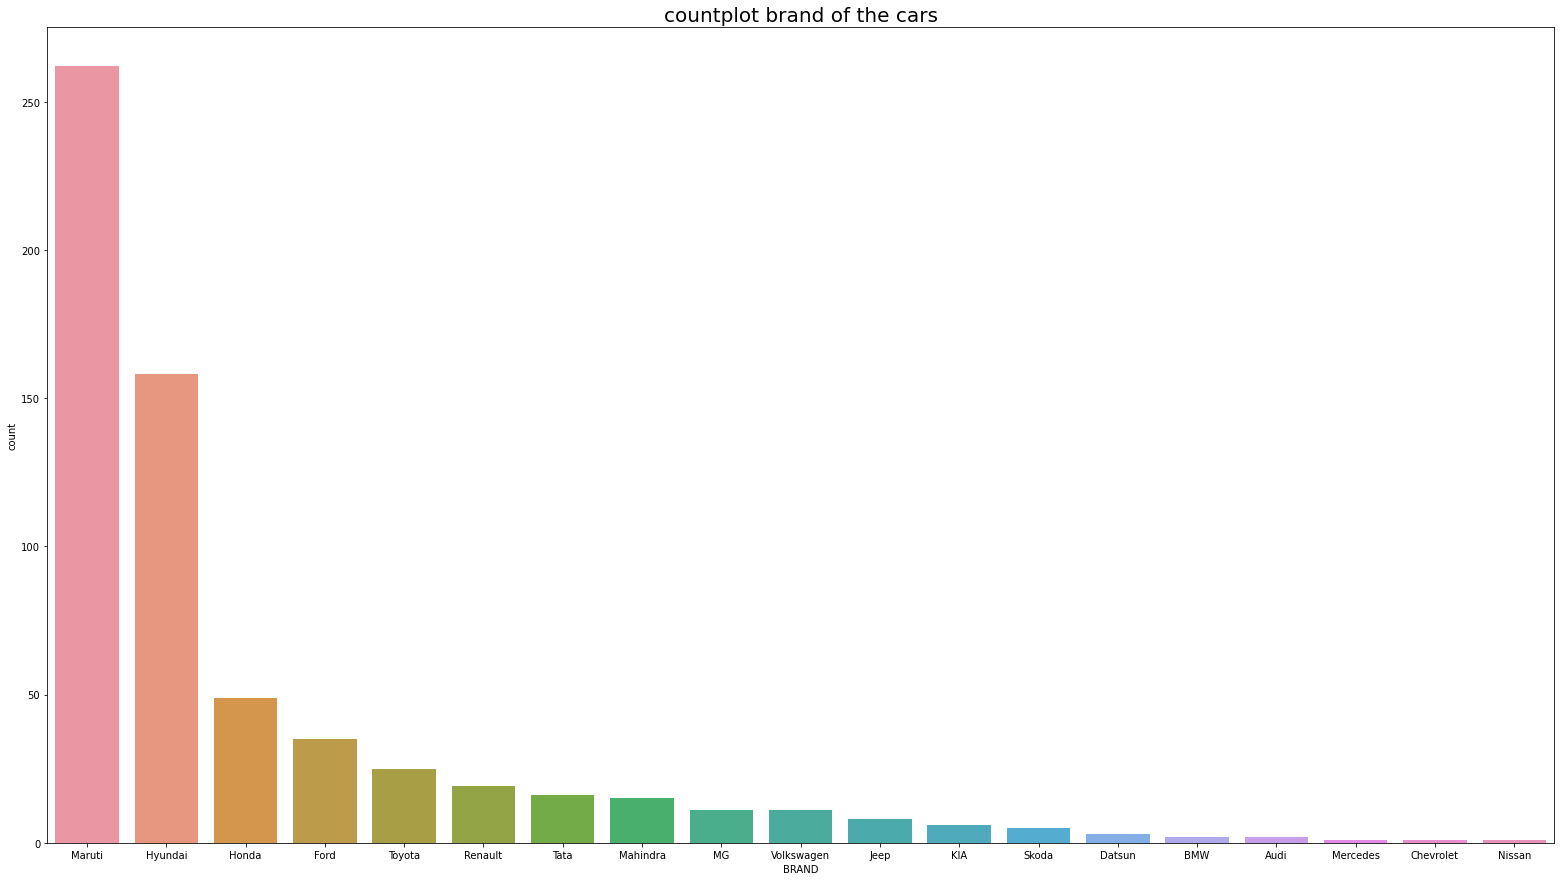

In [55]:
plt.figure(figsize=(27,15))
sns.countplot(v_df["BRAND"], order=v_df['BRAND'].value_counts().iloc[:20].index)
plt.title("countplot brand of the cars",fontsize=20)                                       ## univariate analysis for brand  

### """This is a countplot where we can see the brands of different cars,
### so the plot shows that the Maruthi cars are there more than 200 after that 100 hyundai cars are there in a 2nd place,and rest of the cars are below 50 only but there are less cars like Audi,Nissan,Jaguar,Datsun, Merc      edes,BMW,Chevrolet,..These are the cars are very less Reason because these car owners are very rich so most of them dont like to sale there cars ."""

Text(0.5, 1.0, 'HISTOGRAM FOR BRAND OF THE CAR')

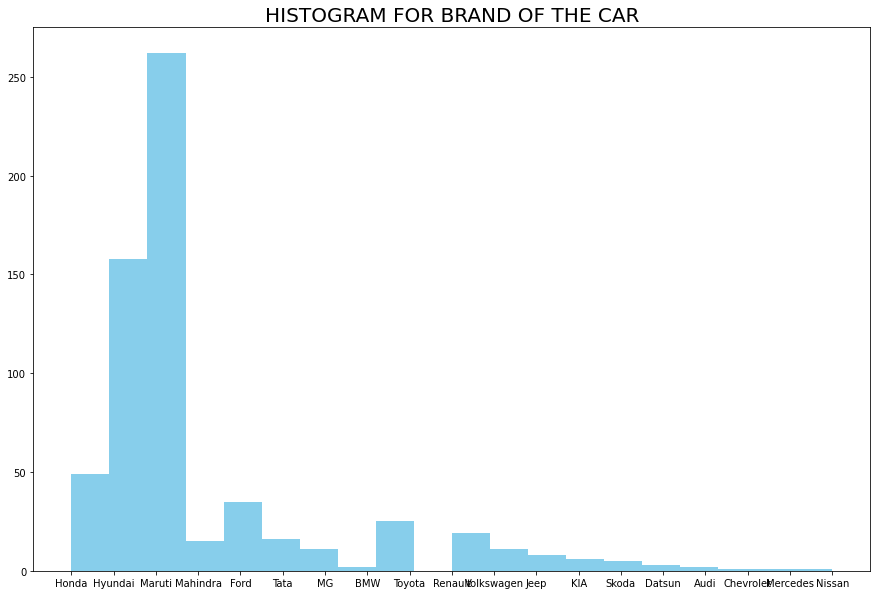

In [56]:
plt.figure(figsize=(15,10))
plt.hist(v_df.BRAND,color="skyblue",bins=20)
plt.title("HISTOGRAM FOR BRAND OF THE CAR",fontsize=20)          ## univariate analysis for brand

### This is also same like upper plot but this plot is histogram plot 

### Univariate analysis
### plotting for Numerical data:

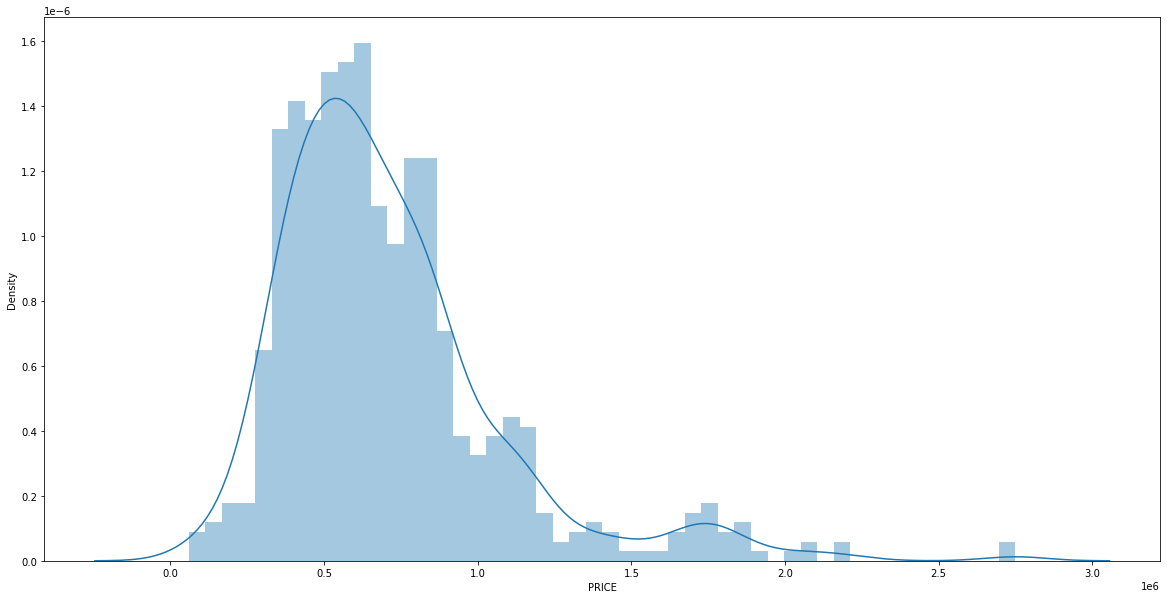

In [57]:
plt.figure(figsize=(20,10))
sns.distplot(v_df['PRICE'], bins=50)
plt.show()

##### This is a distribution plot for the prices of the car.
##### In this plot we can see prices of the cars 
##### The prices are different it has high prices and low prices of the cars, and it has the outliers also,
##### The plot is in normal distribution and it is positive skewness.



Text(0.5, 1.0, 'BOX PLOT- PRICE OF THE CAR')

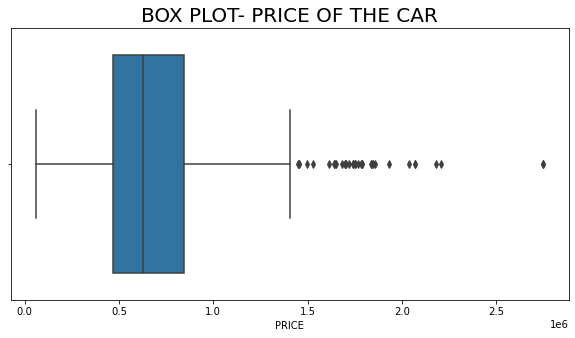

In [58]:
plt.figure(figsize=(10,5))
sns.boxplot(v_df.PRICE);
plt.title('BOX PLOT- PRICE OF THE CAR', fontsize=20)               # univariate analysis for numeric values.

### This boxplots for the price of the cars.
#### In this plot we can understand that50% of prices of the cars lies below the 6lakhs and remaining 50% of prices  lies btm 6lakhs and 14lakhs. 

Text(0.5, 1.0, 'BOX PLOT- EMI OF THE CAR')

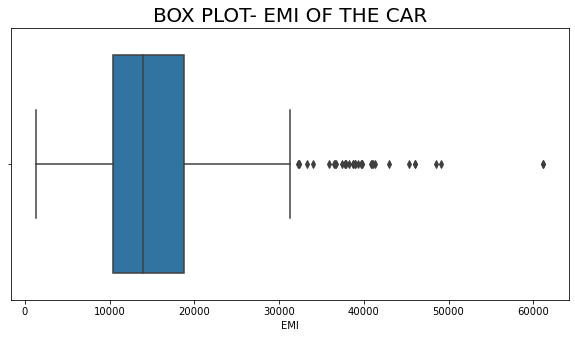

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(v_df.EMI);
plt.title('BOX PLOT- EMI OF THE CAR', fontsize=20)                        # univariate analysis for numeric values.   

### This is the Boxplot for the emi.
### So in this we can understand that emi of the cars are lies btw 0 to 31000, and we can get the min,max emi of the cars, 50% of the cars emi is lies btw 0 to 15k and the remaining 50% of the emi lies btw the 15k to 32k and there are some emi's where like a outlier, 35k,40k,61k and etc 
### by seeing this plot we can understand that if we want to buy a car in instalment basis we getsome idea of instalments and these instalments are based on the prices of the cars.

Text(0.5, 1.0, 'BOX PLOT- YEAR OF THE CAR')

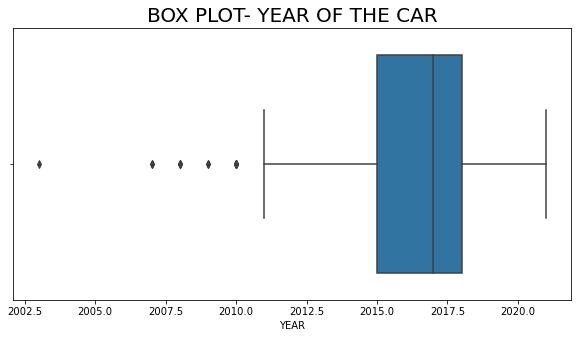

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(v_df.YEAR);
plt.title('BOX PLOT- YEAR OF THE CAR', fontsize=20)                        # univariate analysis for numeric values.  

### This is a boxplot of the year of the cars
### so this is a information of the cars year we can understand in cars24 we can see that 50% of the cars are 2011 to 2016year model car and remaining 50% cars are btw 2016 to 2021, that 2011 to 2015 model cars are more than other years models cars 

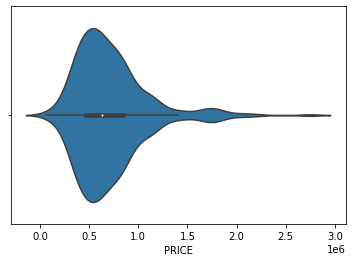

In [61]:
sns.violinplot(v_df.PRICE);  

### This is the violin plot which shows the prices of the cars in cars24

## BIVARIATE ANALYSIS
## plotting for Categorical & numerics data

Text(0.5, 1.0, 'BOX PLOT- BRAND AND PRICE OF THE CAR')

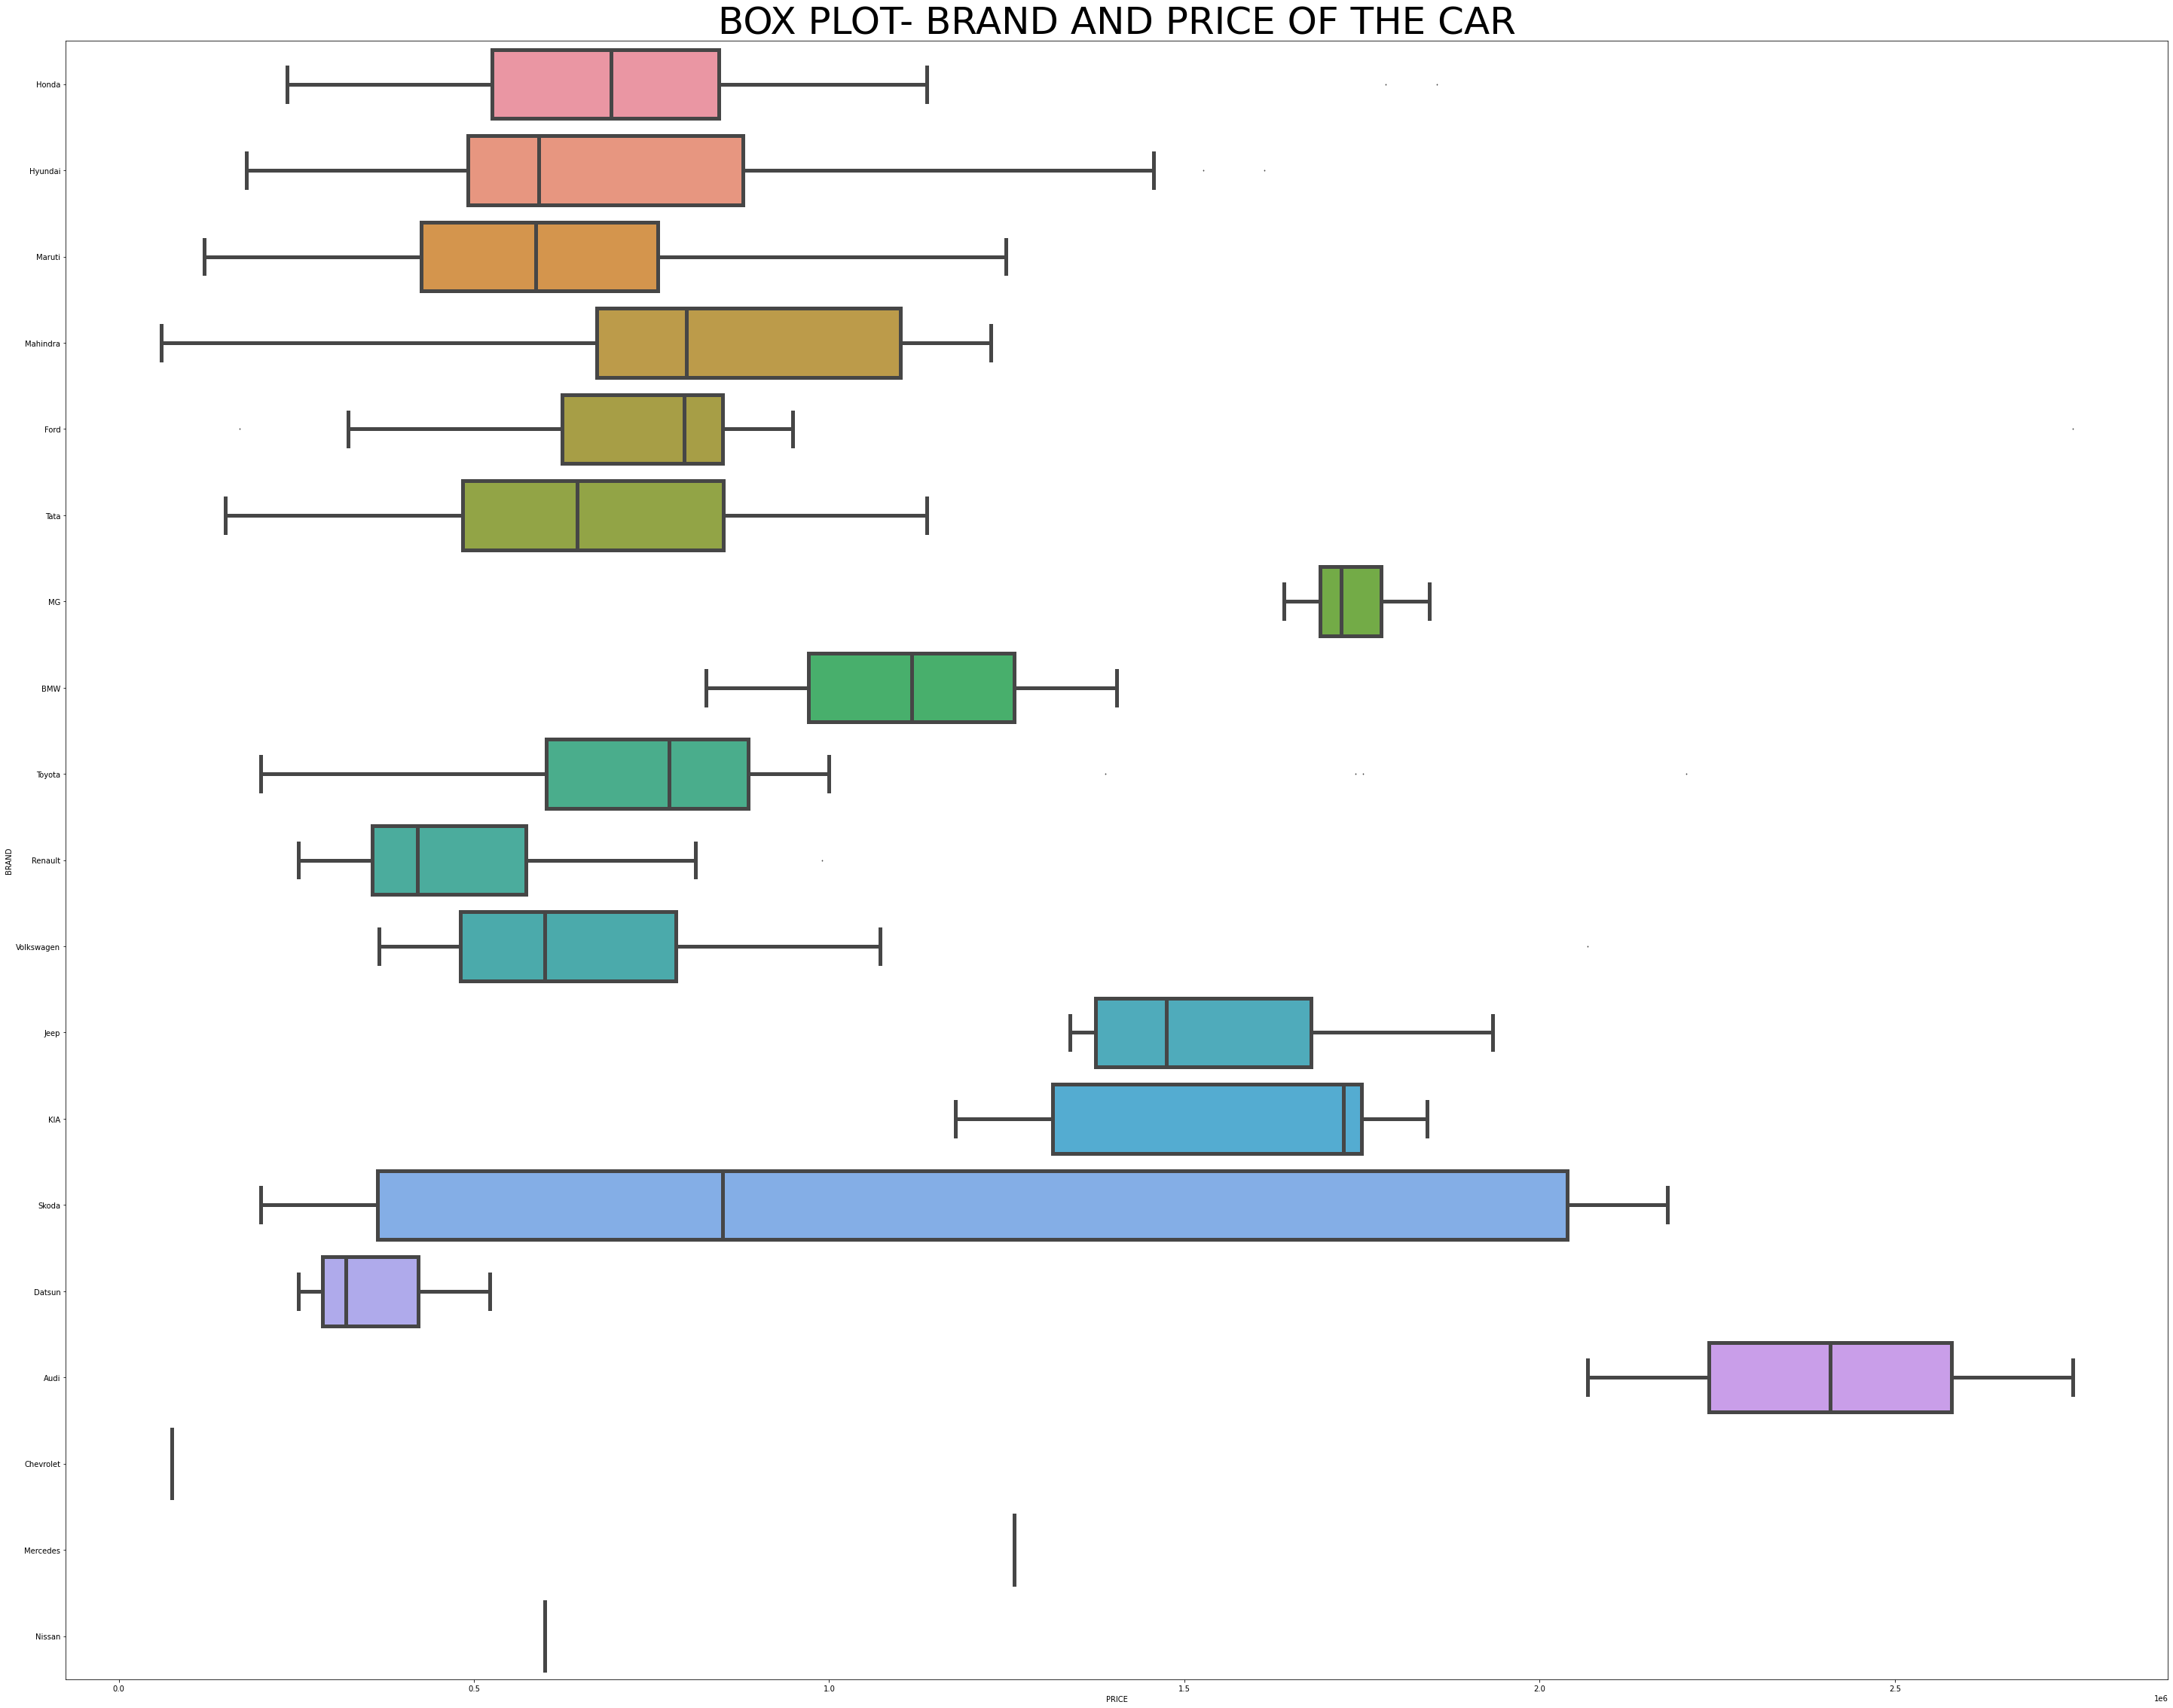

In [62]:
plt.figure(figsize=(50,40))
sns.boxplot(x='PRICE', y='BRAND', data=v_df,linewidth=5.0,fliersize=1);
plt.title('BOX PLOT- BRAND AND PRICE OF THE CAR', fontsize=50)                 # BIVARIATE ANALYSIS FOR NUMERIC VALUE

### This is a box and whisker plot, in this plot we can see the brand and their prices:
### In this plot we can see the highest price for the audi car, next is jaguar car has highest price,we can see the lowest price for the car cheverolet for mg cars the minimum price is not there it has only the maximum price and median price 


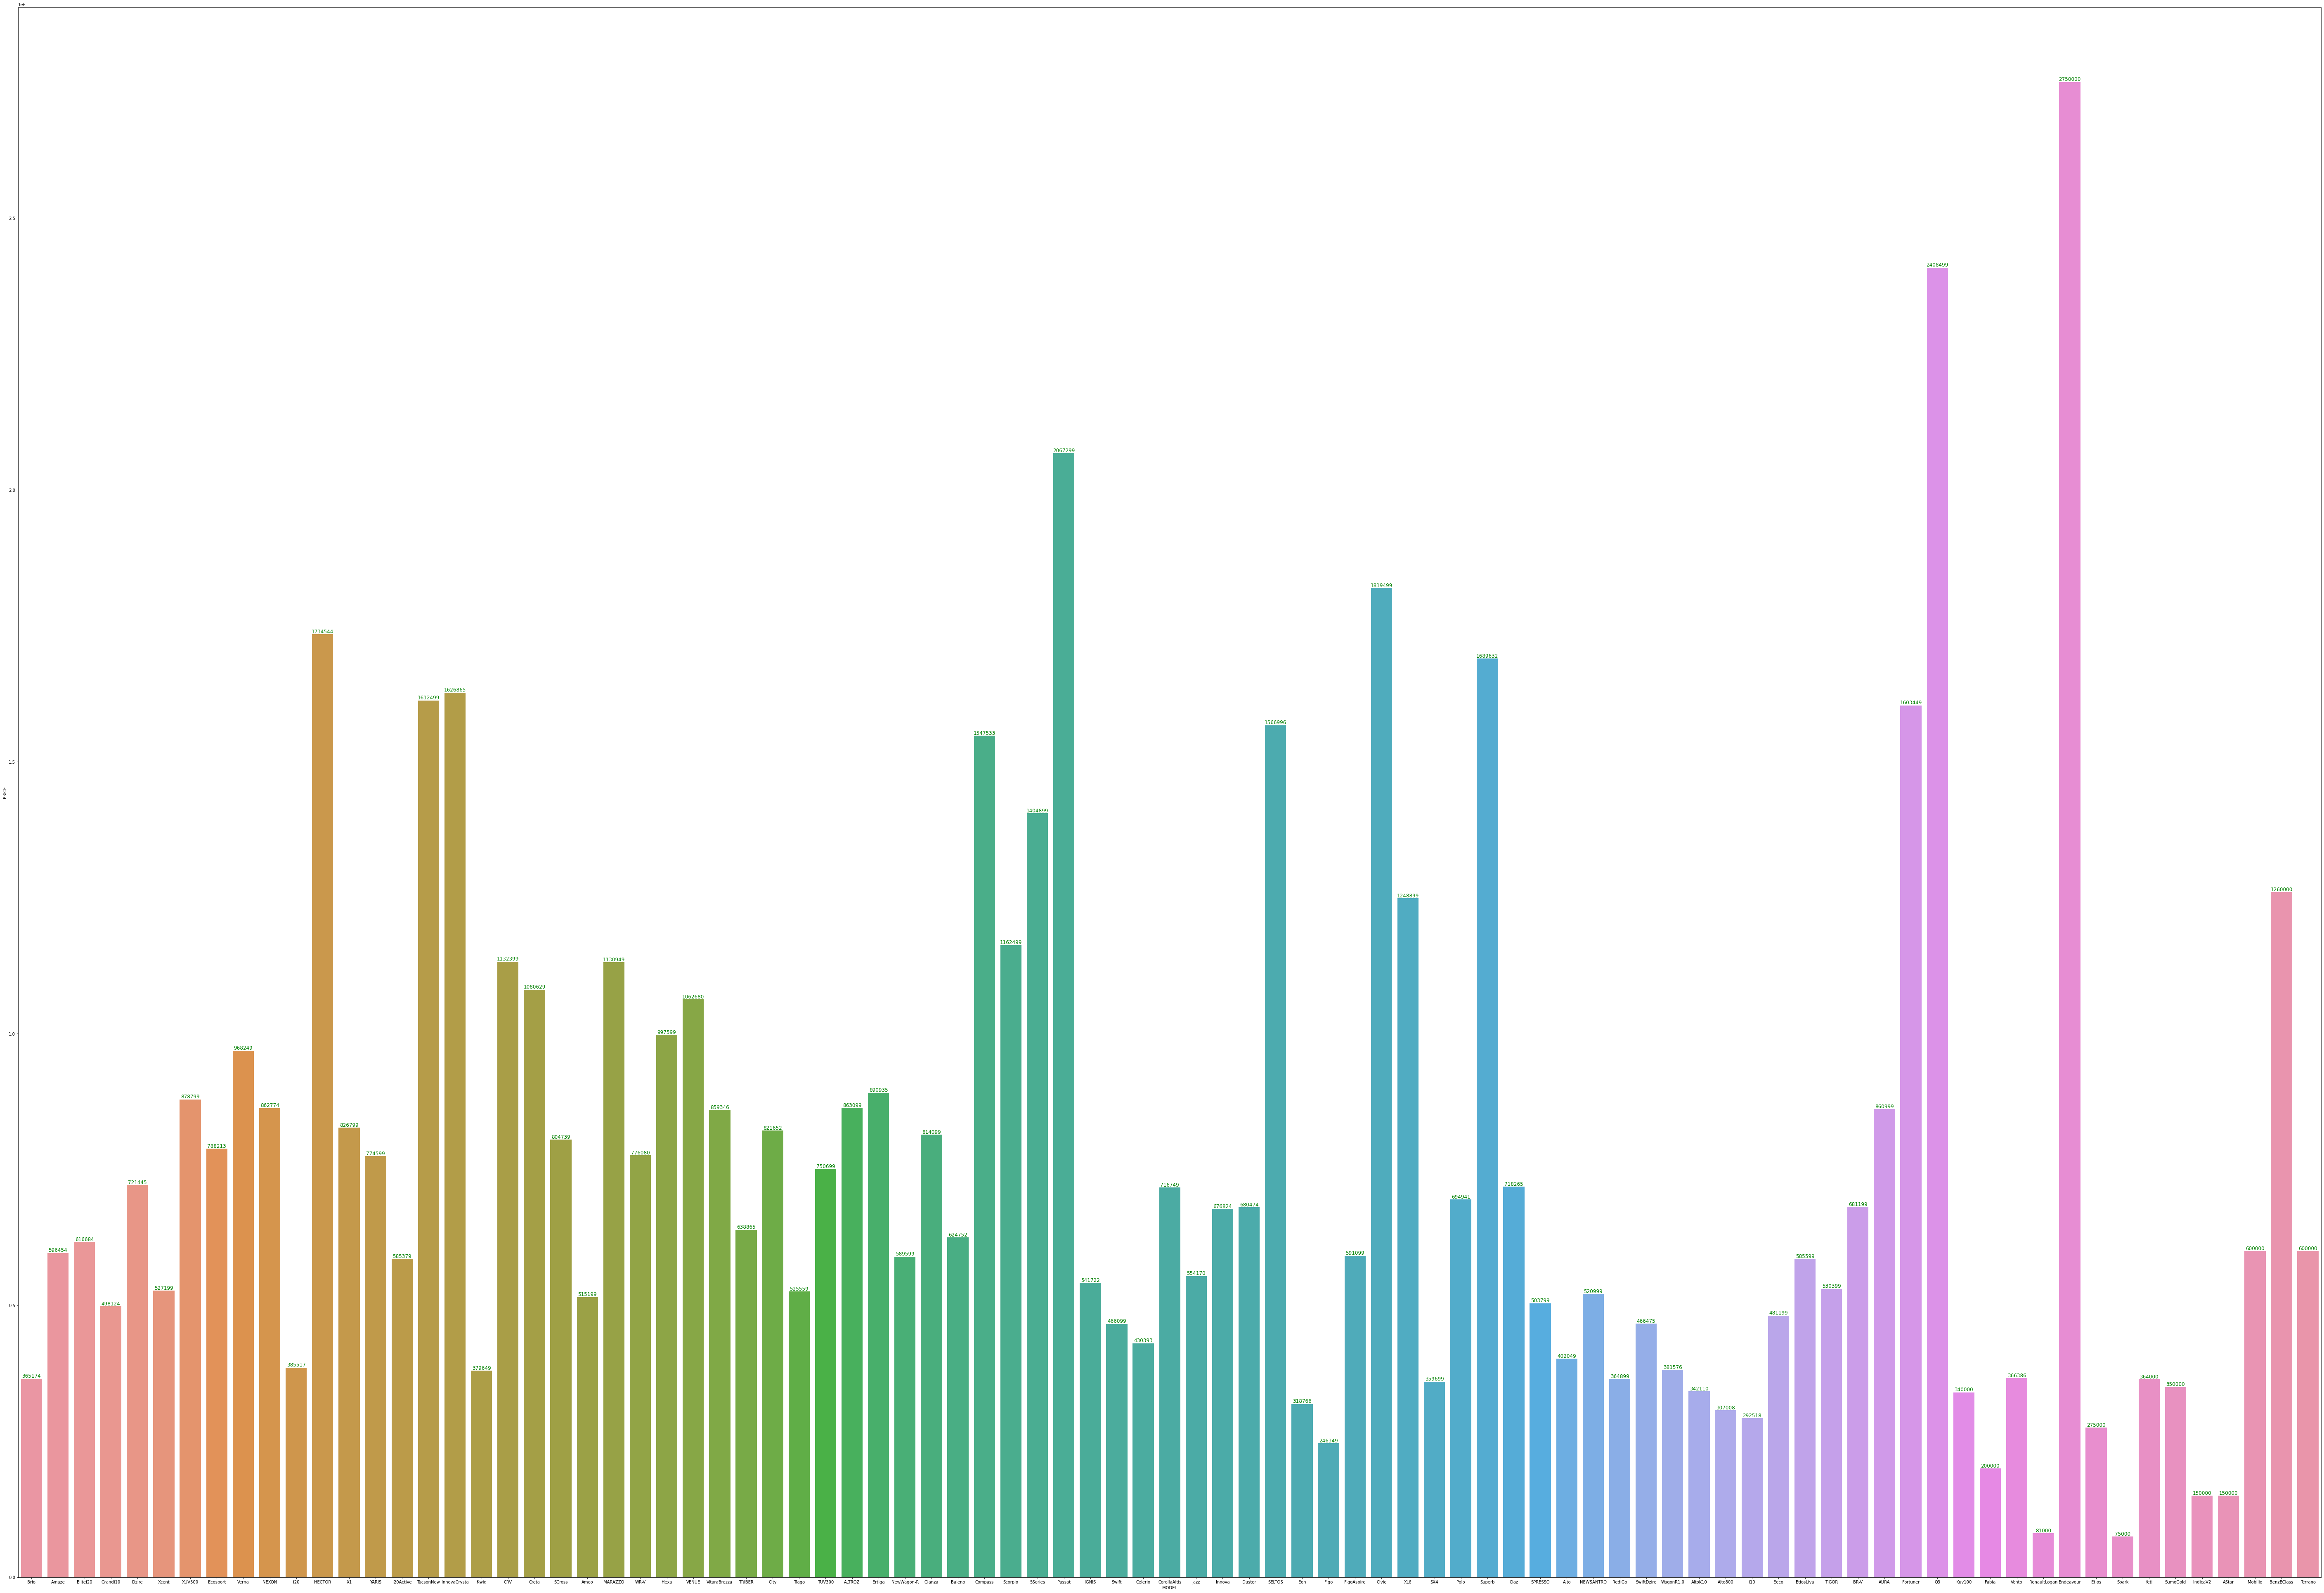

In [63]:
plt.figure(figsize=(100,70))    
sns.barplot(x="MODEL", y="PRICE", ci=None, data=v_df)

ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=12, color='green', ha='center', va='bottom')


### This is about model and price in the barplot
### In this plot we have many model cars and their prices.Here we can see the endeavour,Q3 model are the highest price cars,spark has the lowest price car
### In this plot we can see the clear picture of the models and the prices.

Text(0.5, 1.0, 'pointplot for price and brand of the cars')

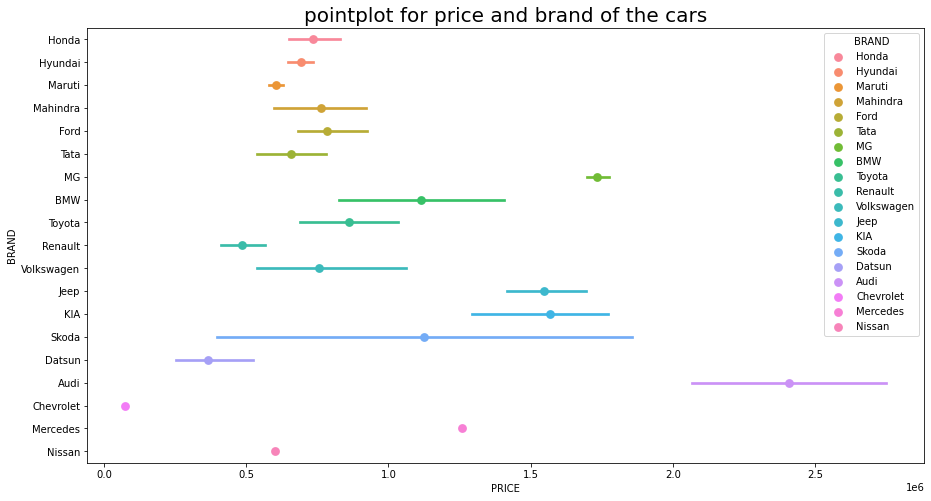

In [64]:
plt.figure(figsize=(15,8))
sns.pointplot(v_df['PRICE'],v_df['BRAND'],hue=v_df['BRAND'])
plt.title("pointplot for price and brand of the cars",fontsize=20)

### This is a pointplot for the Brand,price of the car.

### numerical vs numerical

### Bivariate Analysis:


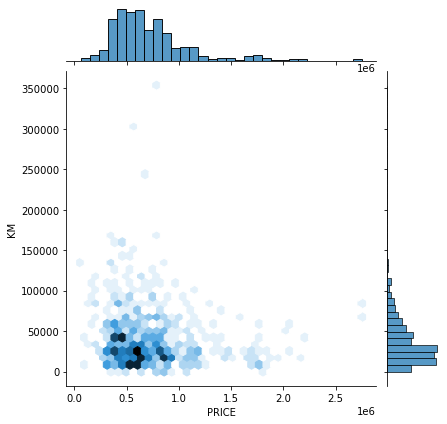

In [65]:
sns.jointplot(v_df['PRICE'], v_df['KM'], kind="hex")


### This is jointplot for the Price and km
### In this plot we can see that,As per the the km and brand the price is decided.

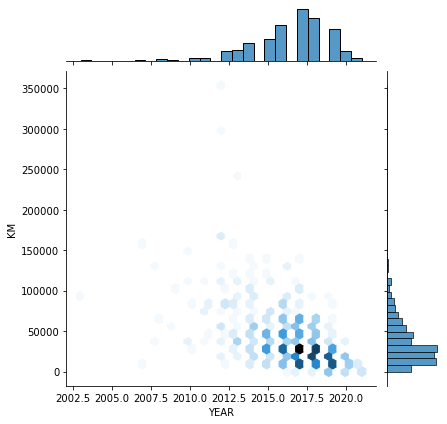

In [66]:
sns.jointplot(v_df['YEAR'], v_df['KM'], kind="hex")

### This is a jointplot for the year and km
### In this plot we can see that cars which is highest km has and low km has.

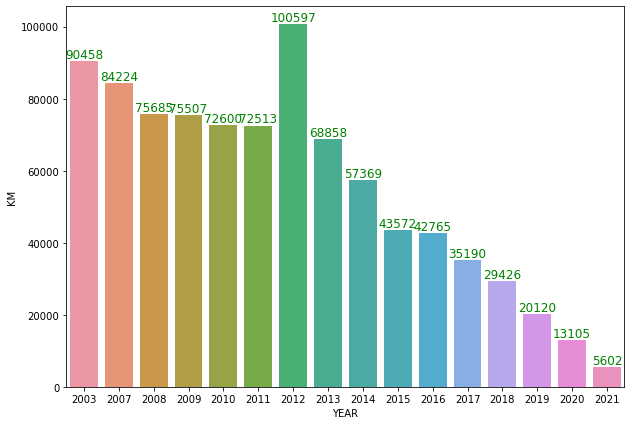

In [67]:
plt.figure(figsize=(10,7))    
sns.barplot(x="YEAR", y="KM", ci=None, data=v_df)

ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), fontsize=12, color='green', ha='center', va='bottom')


### This is barplot for year and km
### In this plot we can see that in this year this model car has highest km.

Text(0.5, 1.0, 'scatter plot for Price,EMI of the cars')

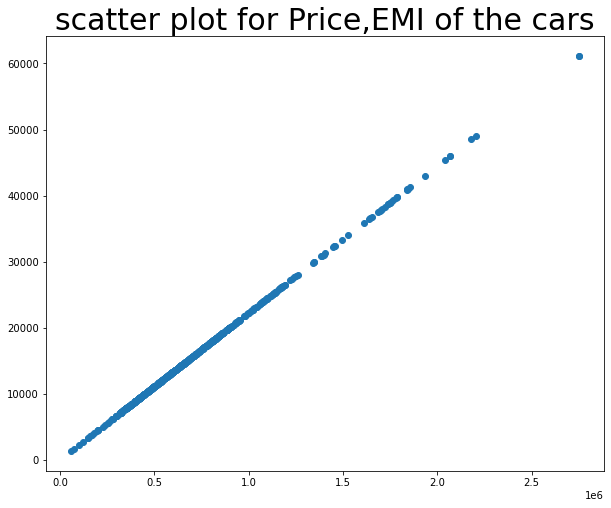

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(v_df.PRICE,v_df.EMI);
plt.title("scatter plot for Price,EMI of the cars",fontsize=30)                  # BIVARIATE ANALYSIS FOR PRICE & EMI:

### This is a scatter plot for the price and emi of the car.
### It show the positive relationship between the price and emi
### It is positively skewed plot.

Text(0.5, 1.0, 'scatter plot for Price & year of the cars')

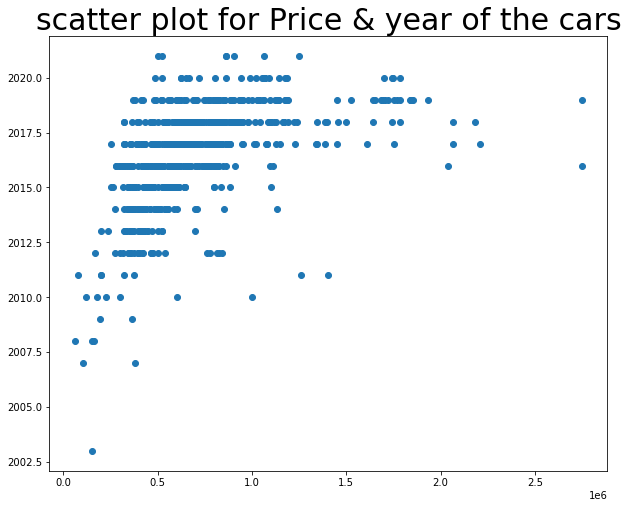

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(v_df.PRICE,v_df.YEAR);  
plt.title("scatter plot for Price & year of the cars",fontsize=30)       # Bivariate analysis for price & year

### This is a scatterplot for the price and year of the cars
### In this plot we can clearly see that their is no proper relationship between the price and year

<AxesSubplot:title={'center':'REGRESSION PLOT FOR PRICE & YEAR OF THE CARS'}, xlabel='YEAR', ylabel='PRICE'>

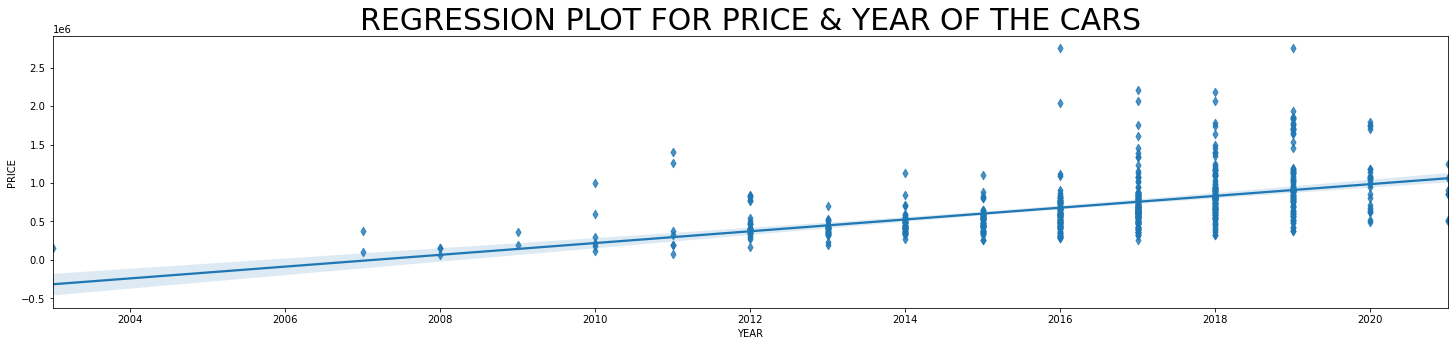

In [70]:
plt.figure(figsize=(25,5))                                                 
plt.title("REGRESSION PLOT FOR PRICE & YEAR OF THE CARS",fontsize=30)
sns.regplot(x="YEAR", y="PRICE", data=v_df,marker='d')                                  # bivariate analysis:

### In this plot we can see is Year and Price of the cars in a regplot 
### In the plot the line is positive,here the price is increasing fastly than the year and we can see the there are few outliers 

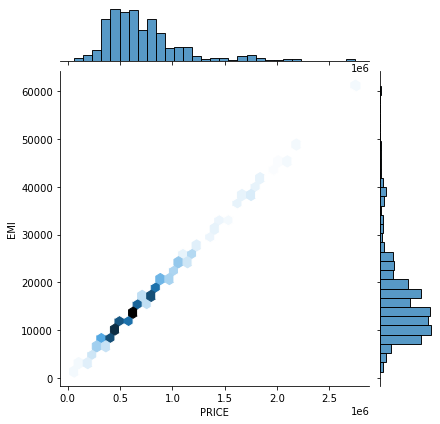

In [71]:
sns.jointplot(v_df['PRICE'], v_df['EMI'], kind="hex")

### This is a jointplot for the price and Emi
### In this plot we can see that price and emi,the price is horizontally towards upside and emi is vertical towards to right side 

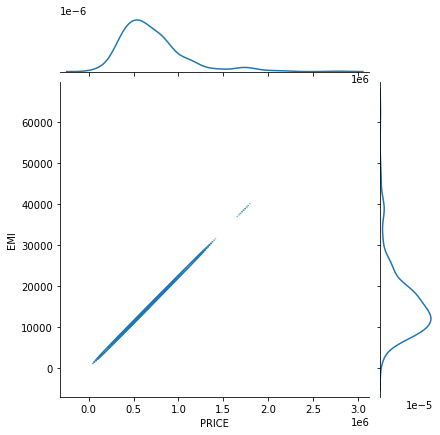

In [72]:
sns.jointplot(v_df['PRICE'], v_df['EMI'], kind="kde")

## Categorical to categorical 
## Bivariate Analysis:

Text(0.5, 1.0, 'stripplot for BRAND,MODEL of the cars')

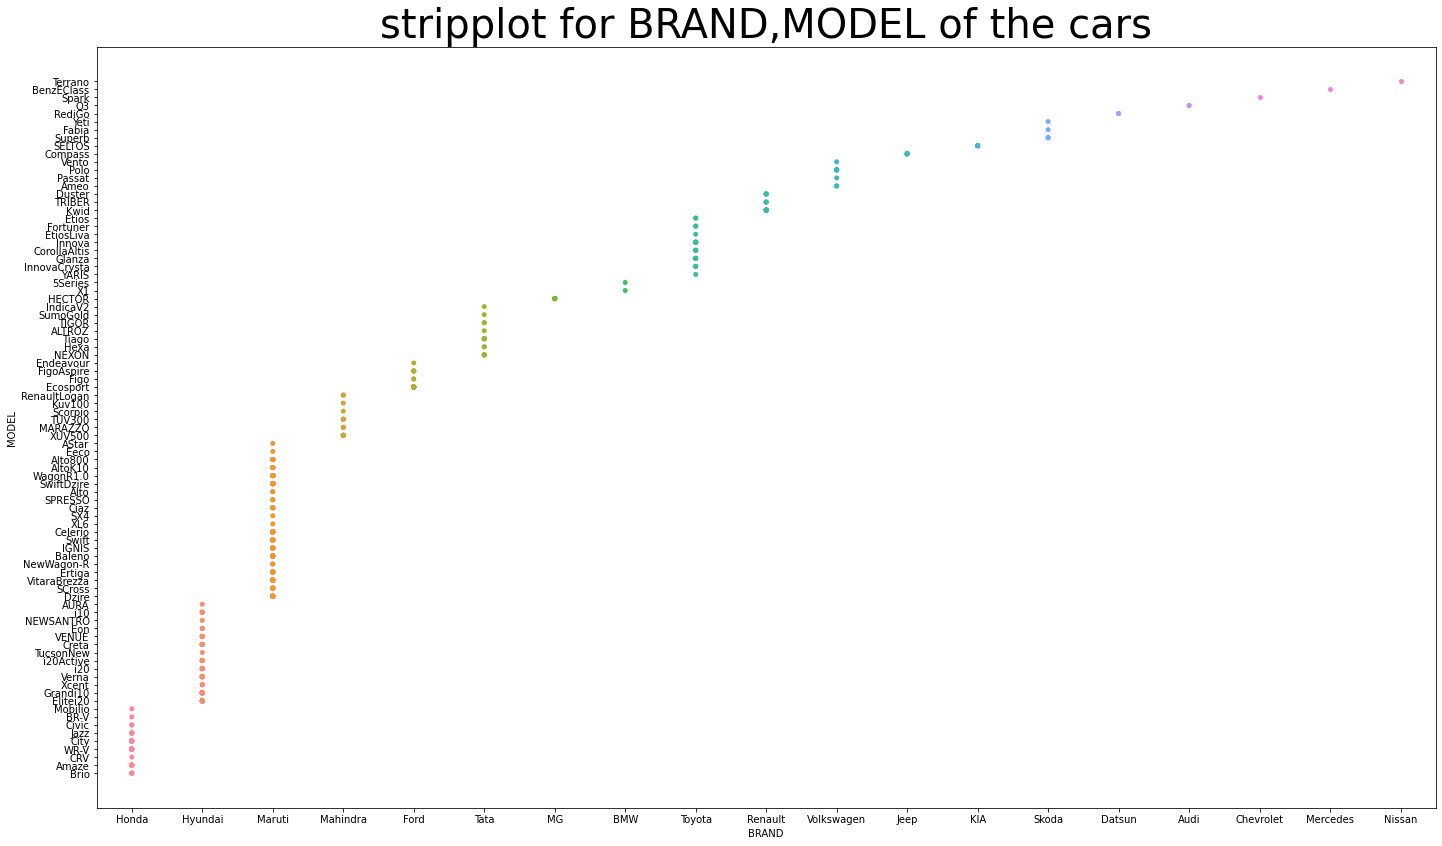

In [73]:
plt.figure(figsize=(24,14))
sns.stripplot(v_df['BRAND'], v_df['MODEL'],jitter = False)
plt.title("stripplot for BRAND,MODEL of the cars",fontsize=40)

### This is a stripplot in this plot we see the car Brand and their model
### In plot we can see that maruthi Brand has many model cars,and then hyundai has more cars models,and we can clearly see that BMW,Datsun,Jaguar,Chevrolet,mercedes,Audi,Nissan has only 1,1 cars

In [74]:
car_fuel=pd.crosstab(v_df['MODEL'],v_df['FUELTYPE'])
car_fuel

FUELTYPE,Diesel,Petrol
MODEL,,
5Series,1,0
ALTROZ,0,1
AStar,0,1
AURA,0,1
Alto,0,2
...,...,...
YARIS,0,1
Yeti,1,0
i10,0,6


Text(0.5, 1.0, 'car & fuel_type')

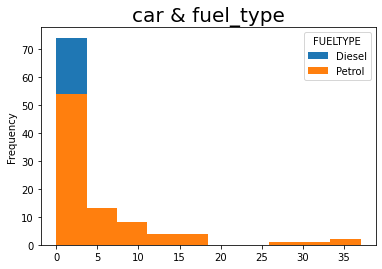

In [75]:
car_fuel.plot(kind="hist")
plt.title('car & fuel_type',fontsize=20)

### In this plot we can see the diesel and petrol for their cars
### In this plot we can see that most of the cars are petrol cars only and very few cars are diesel car there.

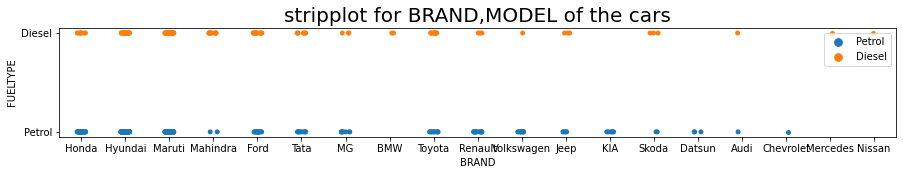

In [76]:
plt.figure(figsize=(15,2))
sns.stripplot(v_df['BRAND'], v_df['FUELTYPE'],jitter = True,hue=v_df['FUELTYPE'])
plt.title("stripplot for BRAND,MODEL of the cars",fontsize=20)
plt.legend()

### In this plot we can see that cars and their fueltype 
### according to customers wish they can see the fueltype and they can bye the cars

## Multivariate analysis
## Numerical vs Numerical vs Numerical values

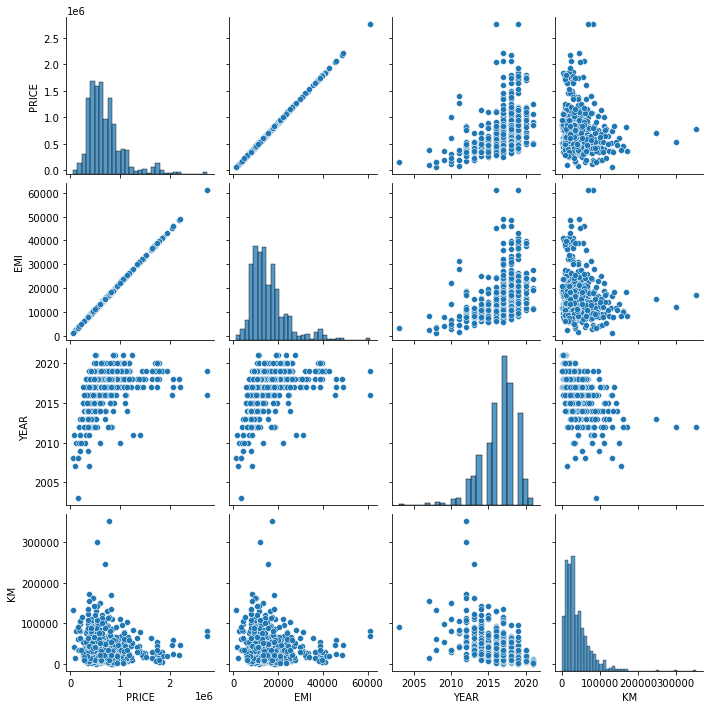

In [77]:
sns.pairplot(v_df)

### In this plot we can see all the numericals values 
### In this plot we can see the every column has two pairplots
### It has the diagonal also
### In emi,price we can see a proper relationship,other plots we dont see a proper relation
### In this plot we can see that every plot has the outliers

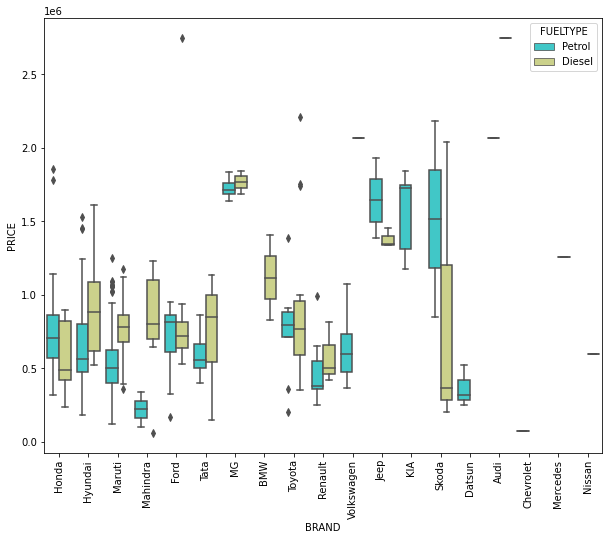

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(x='BRAND',y='PRICE',data=v_df,hue='FUELTYPE', palette='rainbow')
plt.xticks(rotation=90);

### This is a multivariate analysis for brand,price and fueltype.
### In this plot we can understand that according to price and budget we can decide the fueltype of car which we want to buy
### we can also get idea to buy the car according to the price of the car.
### and we can clearly say that the petrol cars are more than the diesel.
### In this plot we can get that diesel cars prices are more.

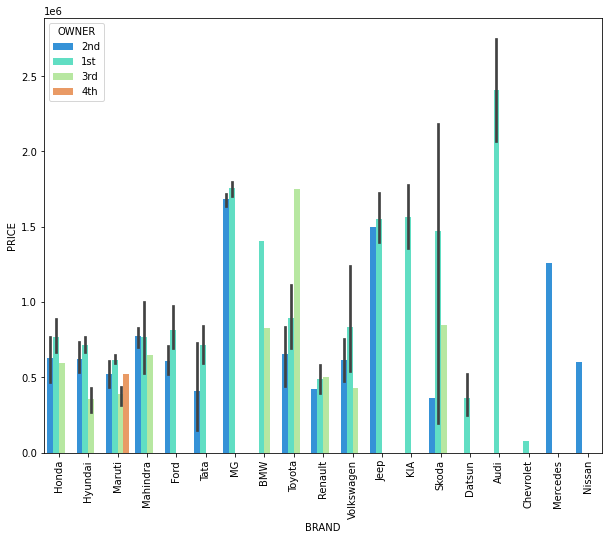

In [79]:
plt.figure(figsize=(10,8))
sns.barplot(x='BRAND',y='PRICE',data=v_df,hue='OWNER', palette='rainbow')
plt.xticks(rotation=90);

### This is a barplot 
### By seeing this plot we can understand that 1st owners are more than 2nd, 3rd owner.
### and the 3rd uwner cars are very less.
### if we want to buy the car which is average price then we can buy the below 10lakhs.

<AxesSubplot:xlabel='YEAR', ylabel='KM'>

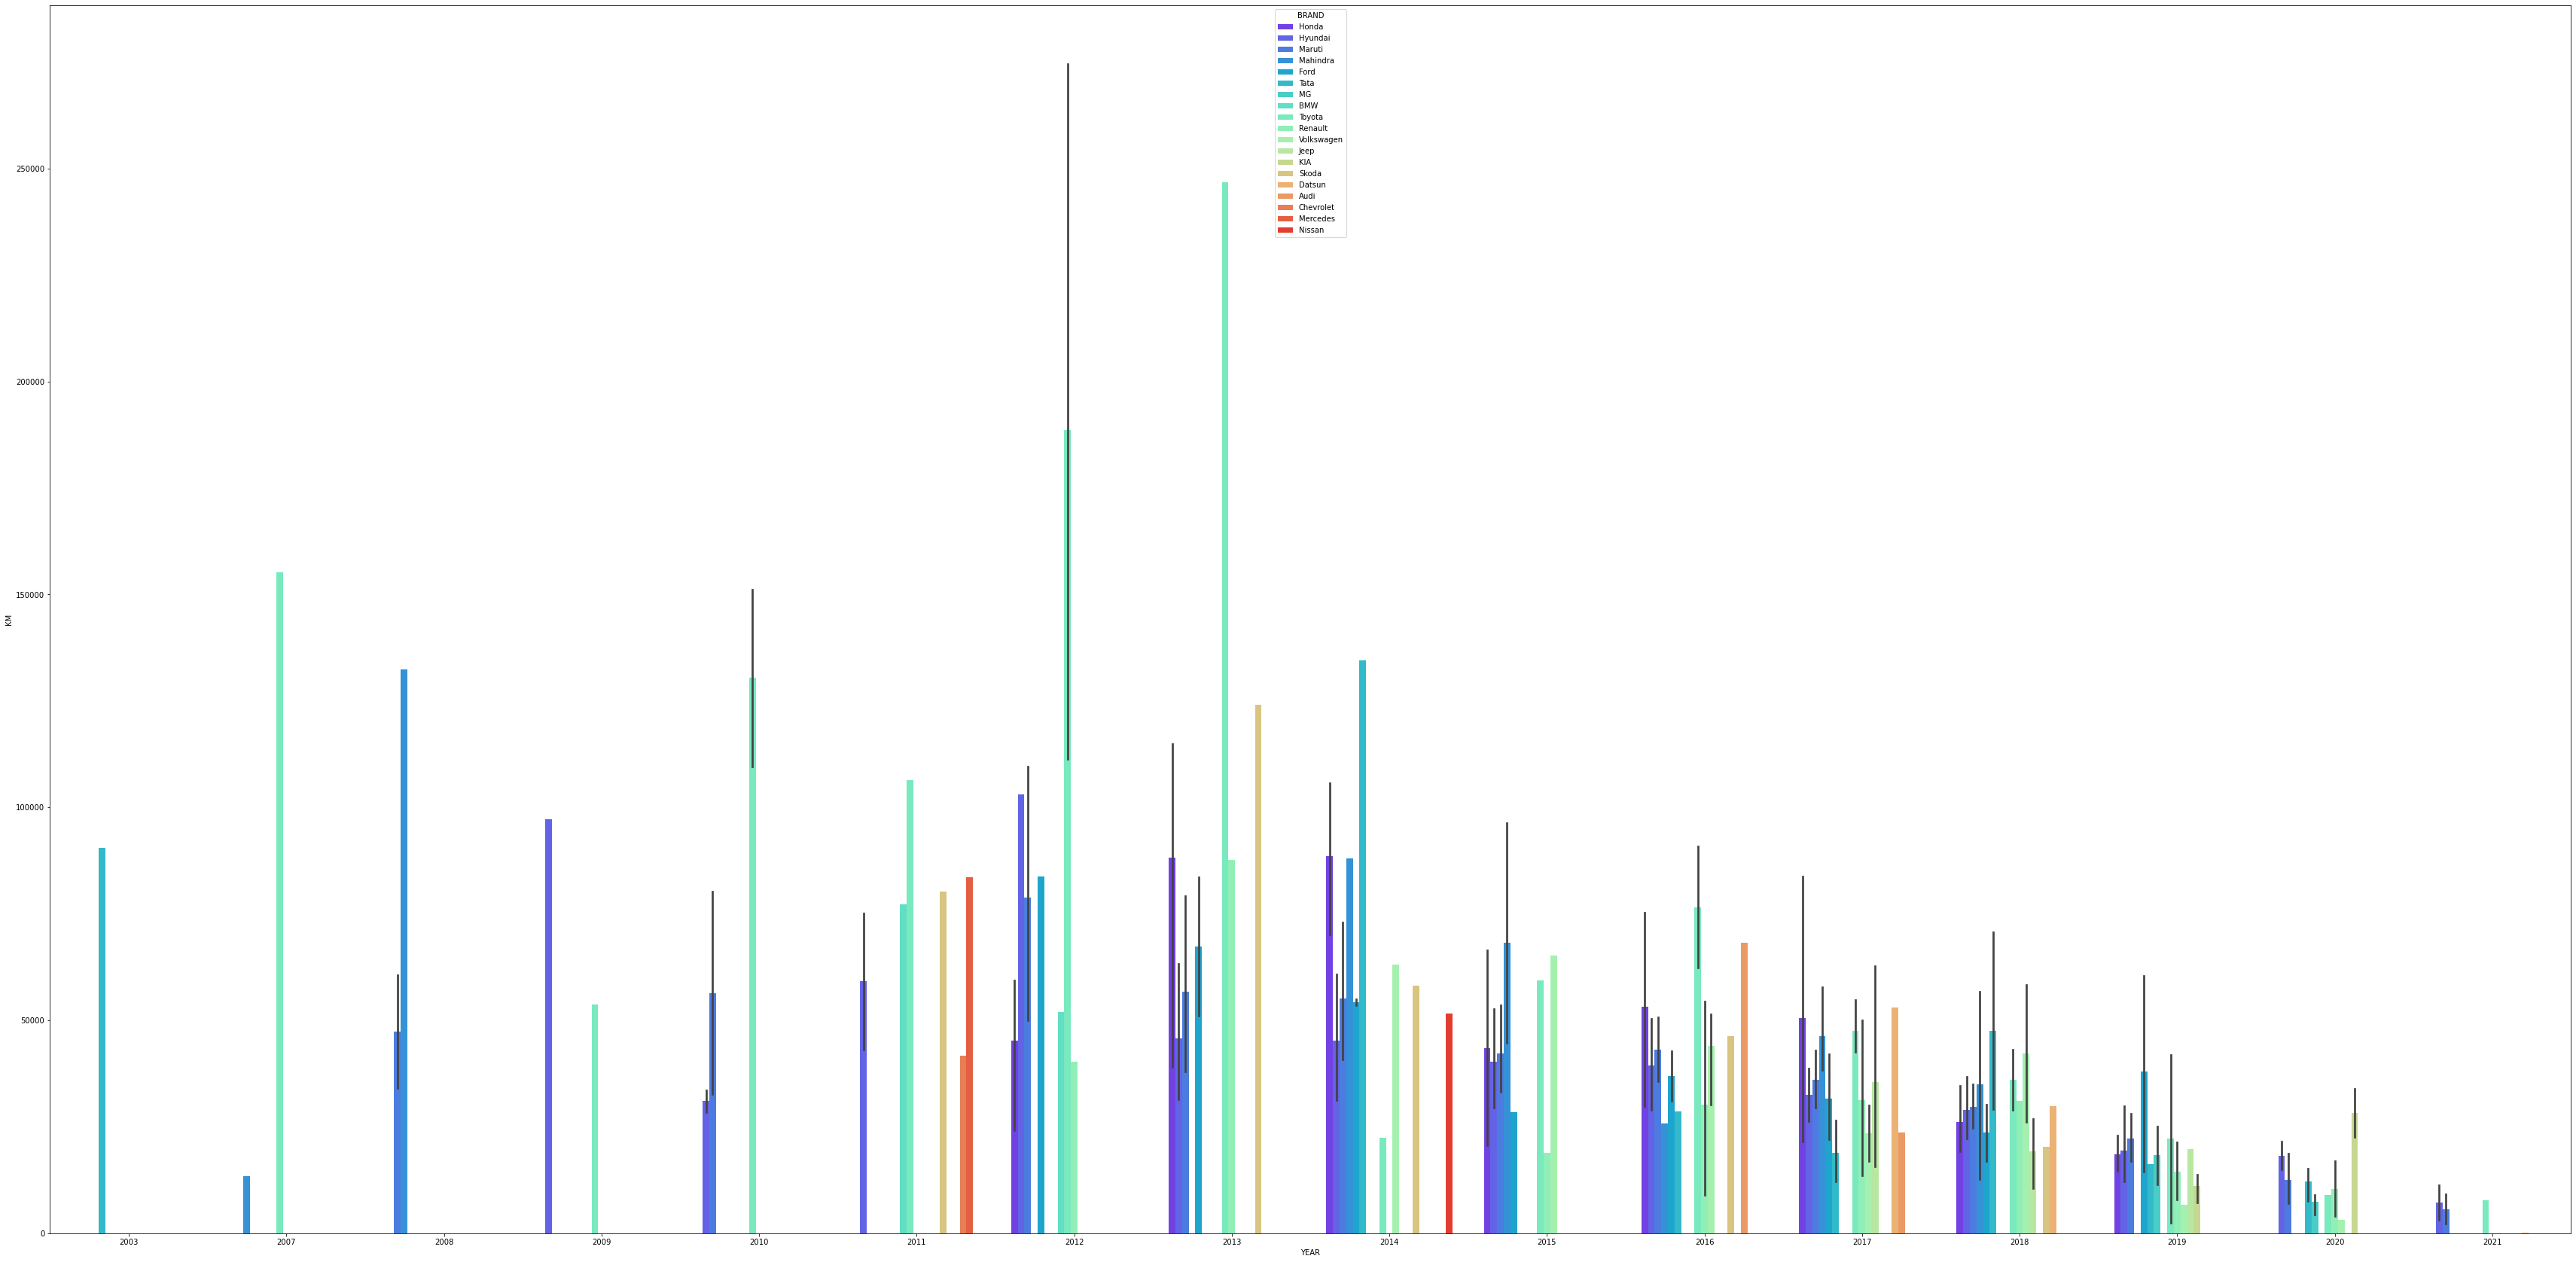

In [80]:
plt.figure(figsize=(60,30))
sns.barplot(x='YEAR',y='KM',data=v_df,hue='BRAND', palette="rainbow")

### This is a plot of the km,year,model of the car in the barplot
### In this plot we can see the model year and how many kms that the car has romed.

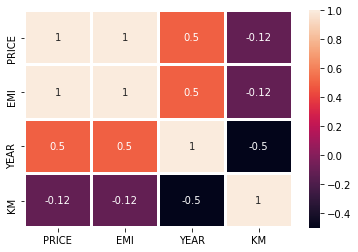

In [81]:
sns.heatmap(v_df.corr(),linecolor='white',linewidths=2,annot=True);

### This data and visualization tells about the cars 
### In this data we can see that we have many cars and by seeing this data we can get an idea to which car should i have to buy

## This data is useful to customers.
## Before buying a car every customer will see this all things, like Brand then model then price after that km and year. After seeing this all then only the customer will buy tha car and this data is usefull to both the parties like buyer and saler(company)
